<a href="https://colab.research.google.com/github/rivheracos/rivheracos/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Análisis Exploratorio de Datos (EDA)
dataset_car = pd.read_csv("Documents/Unad/Trabajos UNAD 2025-I/John Edward/Análisis de datos/Tarea 3/car dataset/dataset_car_tarea3.csv")


In [ ]:
# Información básica
dataset_car.head()
dataset_car.info()
dataset_car.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
# Verificar valores nulos
dataset_car.isnull().sum()

# Análisis de variables categóricas
dataset_car['fuel'].value_counts()
dataset_car['seller_type'].value_counts()
dataset_car['transmission'].value_counts()
dataset_car['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [ ]:
# El dataset contiene 8 columnas y 4340 filas
# No hay valores nulos aparentes
# Variables numéricas: year, selling_price, km_driven
# Variables categóricas: fuel, seller_type, transmission, owner
# Existen valores extremos (outliers) en la variable selling_price y km_driven.
# El precio de venta tiene una desviación estándar alta, lo que indica una gran variación en los precios.
# La variable 'name' contiene información del modelo que podría ser útil

In [ ]:
# Análisis de las Visualizaciones
# 1. Distribución de precios de venta:
# La distribución está sesgada hacia la izquierda, lo que sugiere que la mayoría de los automóviles tienen precios bajos.
# Existen algunos valores muy altos que representan autos de lujo o vehículos con características especiales.
# 2. Distribución de Kilómetros recorridos:
# La mayoría de los vehículos han recorrido menos de 100,000 km.
# Hay una pequeña cantidad de vehículos con un kilometraje extremadamente alto, lo que podría ser un indicio de valores atípicos.
# 3. Relación entre Año de Fabricación y Precio de Venta:
# Existe una correlación positiva entre el año del vehículo y el precio de venta, lo cual es intuitivo ya que los vehículos más nuevos suelen ser más caros.
# Los autos a gasolina tienen una tendencia a ser más baratos en comparación con los autos diésel en años más recientes.
# 4. Relación entre Tipo de Combustible y Precio de Venta:
# Los vehículos de combustible diésel tienden a tener precios más altos que los de gasolina.
# El tipo de combustible CNG (gas natural) y LPG (gas licuado) suelen tener precios más bajos.
# 5. Relación entre Transmisión y precio de Venta:
# Los automóviles con transmisión Automática tienen precios considerablemente más altos en comparación con los de transmisión Manual.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Tratamiento de Valores Atípicos
# Eliminación de outliers en 'selling_price' y 'km_driven' usando el rango intercuartílico (IQR)

# Cálculo del rango intercuartílico (IQR)
Q1_price = dataset_car['selling_price'].quantile(0.25)
Q3_price = dataset_car['selling_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_km = dataset_car['km_driven'].quantile(0.25)
Q3_km = dataset_car['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km

# Definición de límites para identificar outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km

# Filtrado para eliminar los outliers
filtered_data = dataset_car[(dataset_car['selling_price'] >= lower_bound_price) & (dataset_car['selling_price'] <= upper_bound_price)]
filtered_data = filtered_data[(filtered_data['km_driven'] >= lower_bound_km) & (filtered_data['km_driven'] <= upper_bound_km)]

# 2. Codificación de Variables Categóricas utilizando Label Encoding
label_encoder = LabelEncoder()
for column in ['fuel', 'seller_type', 'transmission', 'owner']:
    filtered_data[column] = label_encoder.fit_transform(filtered_data[column])

# 3. Eliminación de columnas irrelevantes (como 'name')
filtered_data = filtered_data.drop(columns=['name'])

# Mostrar el conjunto de datos preprocesado
filtered_data.head(), filtered_data.describe()


(   year  selling_price  km_driven  fuel  seller_type  transmission  owner
 0  2007          60000      70000     4            1             1      0
 1  2007         135000      50000     4            1             1      0
 2  2012         600000     100000     1            1             1      0
 3  2017         250000      46000     4            1             1      0
 4  2014         450000     141000     1            1             1      2,
               year  selling_price      km_driven         fuel  seller_type  \
 count  3962.000000   3.962000e+03    3962.000000  3962.000000  3962.000000   
 mean   2012.952802   3.933060e+05   63031.126451     2.577486     0.806663   
 std       4.227743   2.485049e+05   36224.197516     1.507593     0.448258   
 min    1992.000000   2.000000e+04       1.000000     0.000000     0.000000   
 25%    2011.000000   2.000000e+05   35000.000000     1.000000     1.000000   
 50%    2014.000000   3.450000e+05   60000.000000     4.000000     1.000000

In [ ]:
# Tratamiento de Valores Atípicos:

# Se eliminaron los valores atípicos en las columnas selling_price y km_driven utilizando el rango intercuartílico (IQR).

# El número de registros se redujo de 4340 a 3962, eliminando aproximadamente el 9% de los datos que presentaban valores extremos.

# Codificación de Variables categóricas:

# Se utilizó Label Encoding para transformar las columnas categóricas (fuel, seller_type, transmission, owner) en valores numéricos.

# Eliminación de columnas irrelevantes:

# Se eliminó la columna name ya que no aporta al modelo.

In [ ]:
# Selección de caracteristicas

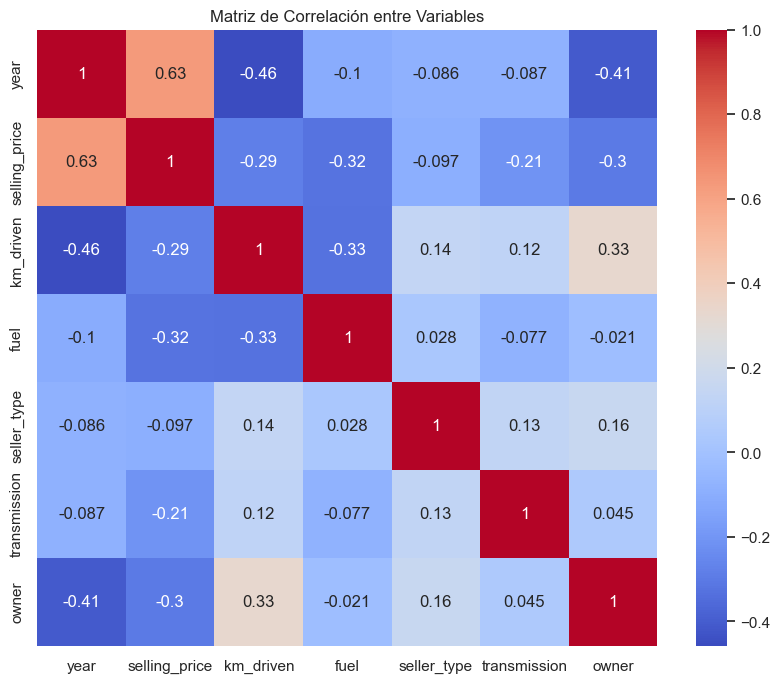

Index(['year', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 1. Matriz de Correlación
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables')
plt.show()

# 2. Selección de Características con RFE (Recursión hacia atrás)
X = filtered_data.drop(columns=['selling_price'])
y = filtered_data['selling_price']

# Modelo de Regresión Lineal
model = LinearRegression()

# Utilizar RFE para seleccionar características
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[fit.support_]
selected_features


In [ ]:
# Selección de características más relevantes
# Las características más significativas seleccionadas mediante el algoritmo RFE son:
# year - Año de fabricación.
# fuel - Tipo de combustible.
# seller_type - Tipo de vendedor.
# transmission - Tipo de transmisión.
# owner - Tipo de propietario.
# Estas características presentan una correlación relevante con el precio de venta del automóvil y serán utilizadas para el modelo de regresión lineal.

In [ ]:
# Entrenamiento del Modelo de Regresión Lineal:

C:\Users\Jose Luis\AppData\Local\Temp\ipykernel_12212\2265889821.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


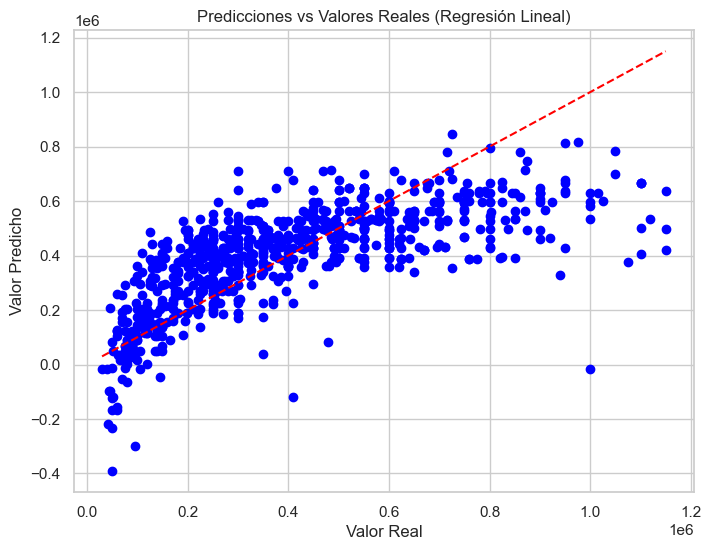

(133106.56032514898, 31463974924.863773, 0.49736116759523785)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. División del Conjunto de Datos en Entrenamiento y Prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# 2. Entrenamiento del Modelo de Regresión Lineal
model.fit(X_train, y_train)

# 3. Predicciones en el Conjunto de Prueba
y_pred = model.predict(X_test)

# 4. Evaluación del Modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Visualización de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.show()

# Resultados de Evaluación
mae, mse, r2


In [ ]:
# Resultados del Modelo de Regresión Lineal
# Errores del Modelo:

# MAE (Error Absoluto Medio): 133,106.56 (representa el error promedio en la predicción del precio).

# MSE (Error Cuadrático Medio): 31,463,974,924.86 (la penalización aumenta con errores más grandes).

# R² (Coeficiente de Determinación): 0.497 (el modelo explica aproximadamente el 49.7% de la variabilidad en el precio de venta).

In [ ]:
# Gráfica de Predicciones vs Valores Reales:

# La gráfica muestra una línea diagonal roja que representa la predicción perfecta.

# Se observa una dispersión considerable, indicando que el modelo puede mejorarse.



In [ ]:
# Interpretación:
# El coeficiente de determinación (R² = 0.497) indica que el modelo puede capturar aproximadamente el 50% de la variabilidad del precio, lo cual no es óptimo.

# El MAE sugiere que, en promedio, las predicciones están desviadas en aproximadamente 133,000.

